# 공공 인공지능 Open API 활용

## 객체 검출(Object Detection)

In [6]:
with open('../static/keys/etri_ai_key.txt') as kfile:
            eai_key = kfile.read(100)

In [7]:
import urllib3
import json
import base64
openApiURL = "http://aiopen.etri.re.kr:8000/ObjectDetect"

In [8]:
import os
image_file = '../static/upload/ani_개.jpg'
_, image_type = os.path.splitext(image_file)
image_type

'.jpg'

In [9]:
image_type = 'jpg' if image_type == '.jfif' else image_type[1:]
image_type

'jpg'

In [10]:
with open(image_file, 'rb') as file:
    image_contents = base64.b64encode(file.read()).decode('utf8')

In [11]:
request_json = {
    "request_id": "reserved field",
    "access_key": eai_key,
    "argument": {
        "file": image_contents,
        "type": image_type
    }
}

In [12]:
http = urllib3.PoolManager()
response = http.request(
    "POST",
    openApiURL,
    headers={"Content-Type": "application/json; charset=UTF-8"},
    body=json.dumps(request_json)
)

In [13]:
print("[responseCode]", response.status)

[responseCode] 200


In [14]:
response.data

b'{"request_id":"reserved field","result":0,"return_type":"com.google.gson.JsonObject","return_object":{"data":[{"class":"dog","confidence":"0.993876","x":"-1","y":"13","width":"278","height":"319"}]}}'

In [15]:
import json
result = json.loads(response.data)
result

{'request_id': 'reserved field',
 'result': 0,
 'return_type': 'com.google.gson.JsonObject',
 'return_object': {'data': [{'class': 'dog',
    'confidence': '0.993876',
    'x': '-1',
    'y': '13',
    'width': '278',
    'height': '319'}]}}

In [16]:
obj_list = result['return_object']['data']
obj_list

[{'class': 'dog',
  'confidence': '0.993876',
  'x': '-1',
  'y': '13',
  'width': '278',
  'height': '319'}]

In [17]:
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt
%matplotlib inline

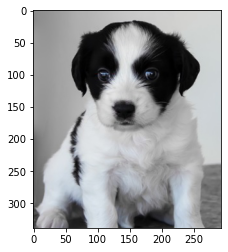

In [18]:
image = Image.open(image_file)
plt.imshow(image);

In [19]:
draw = ImageDraw.Draw(image)
for obj in obj_list:
    name = obj['class']
    x = int(obj['x'])
    y = int(obj['y'])
    w = int(obj['width'])
    h = int(obj['height'])
    draw.text((x+10,y+10), name, font=ImageFont.truetype('malgun.ttf', 20), fill=(255,0,0))
    draw.rectangle(((x, y), (x+w, y+h)), outline=(255,0,0), width=2)

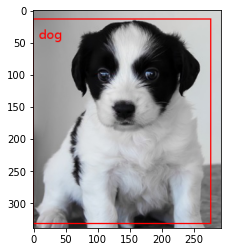

In [20]:
plt.imshow(image);

In [21]:
image.save('../static/img/object.'+image_type)